In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break

In [2]:
DATASET_PATH = os.path.join("severstal-steel-defect-detection")
TRAIN_IMAGE_DATASET_PATH = os.path.join(DATASET_PATH, "train_images")
TEST_IMAGE_DATASET_PATH = os.path.join(DATASET_PATH, "test_images")

init_dir=os.getcwd()

In [3]:
print(TRAIN_IMAGE_DATASET_PATH)

severstal-steel-defect-detection\train_images


In [4]:
print(TRAIN_IMAGE_DATASET_PATH)

severstal-steel-defect-detection\train_images


In [5]:
import glob

train_img_names = sorted(glob.glob(TRAIN_IMAGE_DATASET_PATH +'/' + "*.jpg"))
test_img_names = sorted(glob.glob(TEST_IMAGE_DATASET_PATH +'/' + "*.jpg"))
print(len(train_img_names))
print(len(test_img_names))

12568
5506


In [6]:
train_df_b = pd.read_csv(DATASET_PATH+"/train.csv")
train_df_b['ClassId'] = train_df_b['ClassId'].astype(int)

In [7]:
#train_df_b["ClassId"].value_counts().plot(kind = 'bar')
#train_df_b.groupby(['ClassId'])['ClassId'].count()
train_df_b["ClassId"].value_counts()

ClassId
3    5150
1     897
4     801
2     247
Name: count, dtype: int64

In [8]:
#train_df_b.groupby(['ClassId'])['ClassId'].count().sum()
train_df_b["ClassId"].value_counts().sum()

7095

In [9]:
train_df_b['ImageId'].nunique()

6666

In [10]:
#train_df_b.groupby(['ImageId'])['ImageId'].count().max()
train_df_b["ImageId"].value_counts().max()

3

In [11]:
train_df_b.groupby(['ImageId'])['ImageId'].filter(lambda x: len(x) > 1).count()

856

In [12]:
train_df_b.groupby(['ImageId'])['ImageId'].filter(lambda x: len(x) > 2)

6101    db4867ee8.jpg
6102    db4867ee8.jpg
6103    db4867ee8.jpg
6650    ef24da2ba.jpg
6651    ef24da2ba.jpg
6652    ef24da2ba.jpg
Name: ImageId, dtype: object

In [13]:
train_df_b.loc[train_df_b['ImageId'].isin(['db4867ee8.jpg'])]

,ImageId,ClassId,EncodedPixels
6101,db4867ee8.jpg,1,349941 2 350194 6 350447 11 350700 15 350953 1...
6102,db4867ee8.jpg,2,354411 17 354634 50 354857 82 355096 99 355351...
6103,db4867ee8.jpg,3,233729 3008 236801 64


In [14]:
train_df_b.groupby(['ImageId','ClassId'])['ImageId'].count().max()

1

In [15]:
train_df = train_df_b.pivot(index='ImageId',columns='ClassId',values='EncodedPixels')
train_df['count'] = train_df.count(axis=1)
train_df

ClassId,1,2,3,4,count
ImageId,,,,,
0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,NaN,NaN,NaN,1
0007a71bf.jpg,NaN,NaN,18661 28 18863 82 19091 110 19347 110 19603 11...,NaN,1
000a4bcdd.jpg,37607 3 37858 8 38108 14 38359 20 38610 25 388...,NaN,NaN,NaN,1
000f6bf48.jpg,NaN,NaN,NaN,131973 1 132228 4 132483 6 132738 8 132993 11 ...,1
0014fce06.jpg,NaN,NaN,229501 11 229741 33 229981 55 230221 77 230468...,NaN,1
...,...,...,...,...,...
ffcf72ecf.jpg,NaN,NaN,121911 34 122167 101 122422 169 122678 203 122...,NaN,1
fff02e9c5.jpg,NaN,NaN,207523 3 207777 9 208030 15 208283 22 208537 2...,NaN,1
fffe98443.jpg,NaN,NaN,105929 5 106177 14 106424 24 106672 33 106923 ...,NaN,1


In [16]:
import cv2

def read_image_with_masks(row_id, df):
    fname_o = df.iloc[row_id].name
    fname = TRAIN_IMAGE_DATASET_PATH +'/' + fname_o
    onlyname = fname_o.split('.')[0]
    
    labels = df.iloc[row_id][:4]
    image = cv2.imread(fname)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    shape=image.shape

    list_names = []
    list_with_all_masks = []

    for classname, label in enumerate(labels.values):
        if label is not np.nan:
            string_array = label.rstrip().split()
            int_array = [int(string) for string in string_array]
            binary_mask = create_mask(int_array, shape)
            list_with_all_masks.append(binary_mask)
            list_names.append(int(classname))
                
    return fname, onlyname, image, list_with_all_masks, list_names

def create_mask(int_array, shape):
    result = np.zeros((shape[0], shape[1]), dtype=np.float32)
    positions = map(int, int_array[0::2])
    length = map(int, int_array[1::2])
    mask = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    for pos, le in zip(positions, length):
        mask[pos:(pos + le)] = 1
    result[:, :] = mask.reshape(shape[0], shape[1], order='F')
    
    binary_mask = result.astype(np.uint8)
    return binary_mask

In [17]:
def convert_masks_to_xy(masks, class_labels):
    list_with_all_masks = []
    list_names = []
    for i,mask in enumerate(masks):
        xy_arr = convert_mask_to_polygons(mask)
        for xy_sequence in xy_arr:
            list_with_all_masks.append(xy_sequence)
            list_names.append(int(class_labels[i]))
            
    return list_with_all_masks, list_names

def convert_mask_to_polygons(binary_mask) -> list[list[int | float]]:
    """ Return list of YOLO like annotations for segmentation purposes, i.e. 
    [
        [x1, y1, x2, y2, ..., xn, yn], # object_0
        [x1, y1, x2, y2, ..., xn, yn], # object_1
        ...,
        [x1, y1, x2, y2, ..., xn, yn] # object_m
    ]
    """
    annotations = []

    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_KCOS)

    wh = np.flip(np.array(binary_mask.shape)) # for normalization purposes
    
    for contour in contours:
        #approxPolyDP
        epsilon = 0.001 * cv2.arcLength(contour, True)
        contour_approx = cv2.approxPolyDP(contour, epsilon, True)
        
        #normalization
        contour_approx=contour_approx / wh
        
        polygon = contour_approx.flatten().tolist()
        annotations.append(polygon)
    return annotations

In [18]:
import matplotlib.pyplot as plt

def visualize(image, keypoints):
    h,w = image.shape[:2]
    cpy = image.copy()
    
    for keypoint in keypoints:
        poly = np.asarray(keypoint,dtype=np.float16).reshape(-1,2) # Read poly, reshape
        poly *= [w,h] # Unscale
        
        cv2.polylines(cpy, [poly.astype('int')], True, (255, 0, 0), 2) # Draw Poly Lines
    
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(cpy)

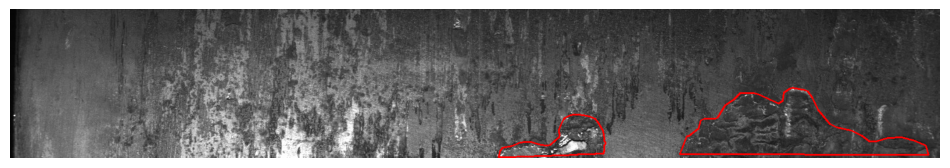

In [19]:
from PIL import Image, ImageDraw 

row_id=13

fname, onlyname, image, masks, class_labels = read_image_with_masks(row_id, train_df)
keypoints, class_labels = convert_masks_to_xy(masks, class_labels)

visualize(image, keypoints)

#img = Image.fromarray(image)#Image.open(fname)
#h,w = image.shape[:2]
#draw = ImageDraw.Draw(img)
#for polygon in keypoints:
#    draw.polygon(polygon,outline=(0,255,0), width=5)
#img

In [20]:
from sklearn.model_selection import train_test_split

train_df_n, val_df_n = train_test_split(train_df, test_size=0.1, stratify=train_df["count"], random_state=54)
#train_df_n, val_df_n = train_test_split(train_df, test_size=0.9, stratify=train_df["count"], random_state=54)
#train_df_n, val_df_n = train_test_split(train_df_n, test_size=0.1, random_state=54)

print([len(train_df_n),len(val_df_n)])

[5999, 667]


In [21]:
import cv2
from PIL import Image, ImageDraw  
import albumentations as A 

img_size = 640

train_transform = A.Compose([
    #A.CenterCrop(smallsize, smallsize),
    A.Resize(width=img_size, height=img_size),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.25, scale_limit=0.25, rotate_limit=45, p=0.5),
    A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    #A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.3),
])

val_transform = A.Compose([
    #A.CenterCrop(smallsize, smallsize),
    A.Resize(width=img_size, height=img_size),
])

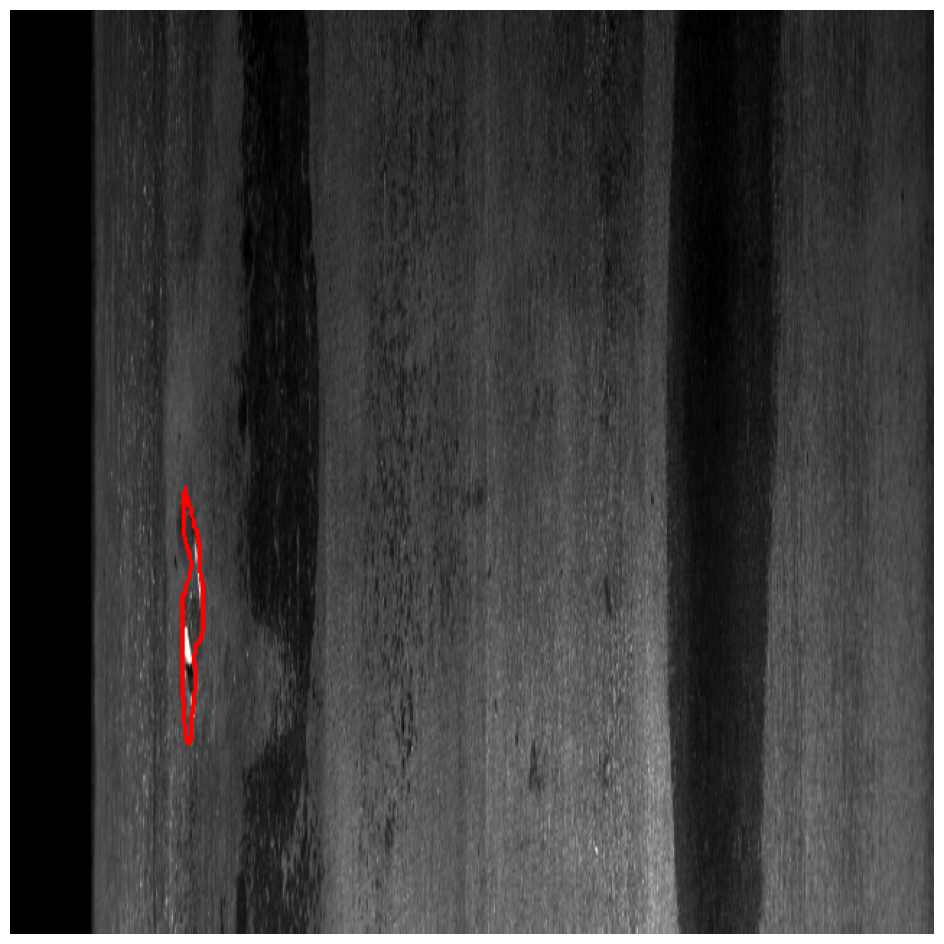

In [22]:
import albumentations as A 
import cv2

#row_id=train_df_n.index.get_loc('d0fb25531.jpg')
row_id=1

fname, onlyname, image, masks, class_labels = read_image_with_masks(row_id, train_df_n)

transformed = train_transform(image=image, masks=masks)
transformed_image = transformed['image']
transformed_masks = transformed['masks']

transformed_keypoints, transformed_class_labels = convert_masks_to_xy(transformed_masks, class_labels)

#print(transformed_keypoints)
visualize(transformed_image, transformed_keypoints)

In [23]:
import os
import shutil

# if os.path.isdir('images'):
#     shutil.rmtree('images')
# if os.path.isdir('labels'):
#     shutil.rmtree('labels')

# !mkdir images
# !mkdir labels

# !mkdir images/train
# !mkdir images/val
# #!mkdir test

# !mkdir labels/train
# !mkdir labels/val
# #!mkdir test


In [24]:
def transform_element(transformM, image, masks, class_labels, onlyname, outdir1, outdir2, img_size, ii=None):
    transformed = transformM(image=image, masks=masks, class_labels=class_labels)
    transformed_image = transformed['image']
    transformed_masks = transformed['masks']
    transformed_class_labels = transformed['class_labels']
    transformed_name = onlyname
    if ii:
        transformed_name += '_'+str(ii)
    nn=os.path.basename(os.path.normpath(transformed_name))
    cv2.imwrite(outdir1 + nn +'.jpg', cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR)) 
    out_file = open(outdir2 + nn +'.txt', 'w')

    transformed_keypoints, transformed_class_labels = convert_masks_to_xy(transformed_masks, transformed_class_labels)
    
    for iii in range(len(transformed_keypoints)):
        kOut=transformed_keypoints[iii]
        clOut=transformed_class_labels[iii]
        
        if(len(kOut)<6):
            continue
            
        #A.core.keypoints_utils.check_keypoints(kOut, img_size, img_size)
        text=str(clOut) + " " + " ".join([str(b) for b in kOut]) + '\n'
        out_file.write(text)
    out_file.close()

In [25]:
os. getcwd()

'D:\\Steel Defect'

In [26]:
outdir1 = os.path.join("images", "train")
outdir2 = os.path.join("label", "train")


In [27]:
print(outdir1)
print(outdir2)

images\train
label\train


In [28]:
outdir1 = "./images/train/"
outdir2 = "./labels/train/"

AUG_COUNT=5

for i in range(len(train_df_n)):
    fname, onlyname, image, masks, class_labels = read_image_with_masks(i,train_df_n)
    transform_element(val_transform, image, masks, class_labels, onlyname, outdir1, outdir2, img_size)
    
    for ii in range(AUG_COUNT):
        transform_element(train_transform, image, masks, class_labels, onlyname, outdir1, outdir2, img_size, ii)


ValueError: Key class_labels is not in available keys.

In [ ]:
!conda list

In [ ]:
outdir1 = "./images/val/"
outdir2 = "./labels/val/"
for i in range(len(val_df_n)):
    fname, onlyname, image, masks, class_labels = read_image_with_masks(i,val_df_n)
    transform_element(val_transform, image, masks, class_labels, onlyname, outdir1, outdir2, img_size)

In [ ]:
outdir1 = "./images/val/"
outdir2 = "./labels/val/"
print(outdir1)

In [ ]:
f = open("./train.yaml", "w")
f.write('path: '+init_dir+"\n")
f.write('train: images/train'+"\n")
f.write('val: images/val'+"\n")
#f.write('test: images/test'+"\n")
#f.write('nc: 4'+"\n")
f.write('names:'+"\n")
f.write('  0: 0'+"\n")
f.write('  1: 1'+"\n")
f.write('  2: 2'+"\n")
f.write('  3: 3'+"\n")
f.write('  4: 4'+"\n")
f.close()

In [ ]:
a = """
# Ultralytics YOLO 🚀, AGPL-3.0 license
# YOLOv8-seg instance segmentation model. For Usage examples see https://docs.ultralytics.com/tasks/segment

# Parameters
nc: 5  # number of classes
scales: # model compound scaling constants, i.e. 'model=yolov8n-seg.yaml' will call yolov8-seg.yaml with scale 'n'
  # [depth, width, max_channels]
  n: [0.33, 0.25, 1024]
  s: [0.33, 0.50, 1024]
  m: [0.67, 0.75, 768]
  l: [1.00, 1.00, 512]
  x: [1.00, 1.25, 512]

# YOLOv8.0n backbone
backbone:
  # [from, repeats, module, args]
  - [-1, 1, Conv, [64, 3, 2]]  # 0-P1/2
  - [-1, 1, Conv, [128, 3, 2]]  # 1-P2/4
  - [-1, 3, C2f, [128, True]]
  - [-1, 1, Conv, [256, 3, 2]]  # 3-P3/8
  - [-1, 6, C2f, [256, True]]
  - [-1, 1, Conv, [512, 3, 2]]  # 5-P4/16
  - [-1, 6, C2f, [512, True]]
  - [-1, 1, Conv, [1024, 3, 2]]  # 7-P5/32
  - [-1, 3, C2f, [1024, True]]
  - [-1, 1, SPPF, [1024, 5]]  # 9

# YOLOv8.0n head
head:
  - [-1, 1, nn.Upsample, [None, 2, 'nearest']]
  - [[-1, 6], 1, Concat, [1]]  # cat backbone P4
  - [-1, 3, C2f, [512]]  # 12

  - [-1, 1, nn.Upsample, [None, 2, 'nearest']]
  - [[-1, 4], 1, Concat, [1]]  # cat backbone P3
  - [-1, 3, C2f, [256]]  # 15 (P3/8-small)

  - [-1, 1, Conv, [256, 3, 2]]
  - [[-1, 12], 1, Concat, [1]]  # cat head P4
  - [-1, 3, C2f, [512]]  # 18 (P4/16-medium)

  - [-1, 1, Conv, [512, 3, 2]]
  - [[-1, 9], 1, Concat, [1]]  # cat head P5
  - [-1, 3, C2f, [1024]]  # 21 (P5/32-large)

  - [[15, 18, 21], 1, Segment, [nc, 32, 256]]  # Segment(P3, P4, P5)"""

f = open("yolov8-seg.yaml", "w")
f.write(a)
f.close()

In [ ]:
!wandb off

In [ ]:
if os.path.isdir('./runs/segment/train'):
    shutil.rmtree('./runs/segment/train')

In [29]:
from ultralytics import YOLO
model = YOLO('yolo11n-seg.pt')

In [7]:
results = model.train(data='train.yaml', epochs=1, batch=1, pretrained=False)

New https://pypi.org/project/ultralytics/8.3.39 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.33  Python-3.11.10 torch-2.5.1 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
engine\trainer: task=segment, mode=train, model=yolo11n-seg.pt, data=train.yaml, epochs=1, time=None, patience=100, batch=1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False

train: Scanning D:\Steel Defect\labels\train.cache... 29995 images, 300 backgrounds, 0 corrupt: 100%|██████████| 29995/


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning D:\Steel Defect\labels\val.cache... 667 images, 0 backgrounds, 0 corrupt: 100%|██████████| 667/667 [00:00


Plotting labels to runs\segment\train6\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\segment\train6
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.15G       2.12      3.216      3.209      1.644          2        640: 100%|██████████| 29995/29995 


AttributeError: 'SegmentationTrainer' object has no attribute 'stats'

In [7]:
image = np.array(Image.open('./runs/segment/train/results.png'))
plt.figure(figsize=(20, 20))
plt.imshow(image)

NameError: name 'np' is not defined

In [9]:
#https://www.kaggle.com/paulorzp/rle-functions-run-lenght-encode-decode
def mask2rle(img):
    '''
    img: numpy array, 1 -> mask, 0 -> background
    Returns run length as string formated
    '''
    pixels= img.T.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

In [10]:
import glob

img_names = sorted(glob.glob(TEST_IMAGE_DATASET_PATH + "/*.jpg"))

NameError: name 'TEST_IMAGE_DATASET_PATH' is not defined

In [34]:
import torch
from ultralytics import YOLO

model = YOLO('./runs/segment/train/weights/last.pt') 


image 1/1 D:\Steel Defect\severstal-steel-defect-detection\test_images\00513039a.jpg: 128x640 (no detections), 40.7ms
Speed: 1.0ms preprocess, 40.7ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 640)


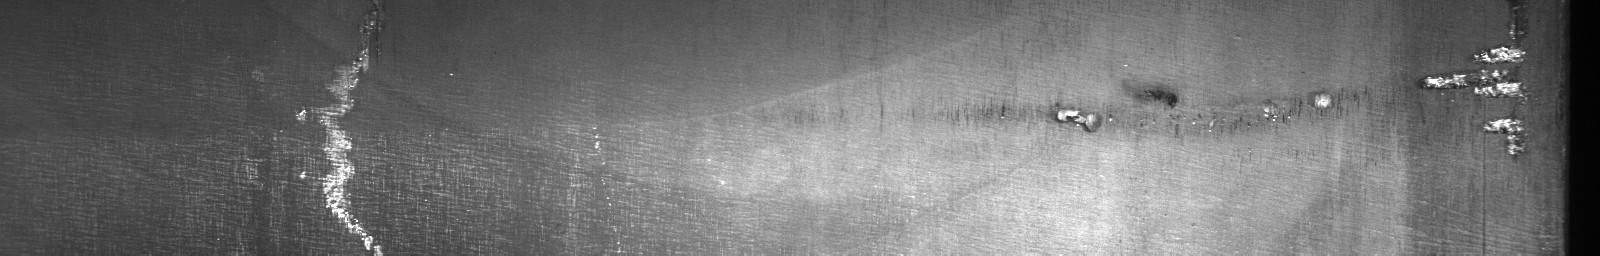

In [35]:
test_img = img_names[6]
img = Image.open(test_img)
draw = ImageDraw.Draw(img)

pred_results = model(test_img)

if(pred_results[0].masks):
    masks = pred_results[0].masks.cpu()
    for mask in masks:
        #maskt = mask.data[0].numpy()
        for polygon in mask.xy:
            #mask_img = Image.fromarray(maskt,"I")
            draw.polygon(polygon,outline=(0,255,0), width=5)
img

In [37]:
def dice_coefficient(y_true, y_pred):
    smooth = 1.0  # Prevent division by zero
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    intersection = (y_true_f * y_pred_f).sum()
    return (2. * intersection + smooth) / (y_true_f.sum() + y_pred_f.sum() + smooth)

In [38]:
def dice_coefficient_callback(trainer):
    """
    Custom callback to calculate Dice Coefficient after validation.
    
    Args:
    - trainer: The YOLO Trainer object.
    """
    predictions = trainer.results.preds  # Predicted bounding boxes or masks
    ground_truths = trainer.dataset.labels  # Ground truth labels or masks

    dice_scores = []

    for pred, gt in zip(predictions, ground_truths):
        # Convert bounding boxes/masks to binary masks if needed
        pred_mask = convert_to_binary_mask(pred)  # Define this function
        gt_mask = convert_to_binary_mask(gt)      # Define this function
        
        # Compute Dice Coefficient
        dice_score = dice_coefficient(gt_mask, pred_mask)
        dice_scores.append(dice_score)
    
    # Average Dice Coefficient for the entire dataset
    avg_dice = np.mean(dice_scores)
    print(f"Dice Coefficient: {avg_dice:.4f}")

In [4]:
from ultralytics import YOLO
model = YOLO('yolo11n-seg.pt')

In [2]:
def dice_metric_callback(trainer):
    """Custom callback to calculate and log Dice Coefficient after validation."""
    dice_scores = trainer.init_metrics.stats('Dice Coefficient')
    if dice_scores is not None:
        print(f"Dice Coefficient (Callback): {dice_scores:.4f}")


In [3]:
def dice_coefficient(pred_mask, gt_mask):
    """
    Compute Dice Coefficient between predicted and ground truth masks.

    Args:
        pred_mask (torch.Tensor): Predicted mask (binary).
        gt_mask (torch.Tensor): Ground truth mask (binary).

    Returns:
        float: Dice Coefficient value (0 to 1).
    """
    pred_flat = pred_mask.view(-1)
    gt_flat = gt_mask.view(-1)
    intersection = torch.sum(pred_flat * gt_flat)
    dice = (2.0 * intersection) / (torch.sum(pred_flat) + torch.sum(gt_flat) + 1e-16)  # Avoid division by zero
    return dice


In [4]:
def update_metrics(self, preds, batch):
    """Metrics."""
    dice_scores = []  # Store Dice Coefficients for each image

    for si, (pred, proto) in enumerate(zip(preds[0], preds[1])):
        self.seen += 1
        npr = len(pred)
        stat = dict(
            conf=torch.zeros(0, device=self.device),
            pred_cls=torch.zeros(0, device=self.device),
            tp=torch.zeros(npr, self.niou, dtype=torch.bool, device=self.device),
            tp_m=torch.zeros(npr, self.niou, dtype=torch.bool, device=self.device),
        )
        pbatch = self._prepare_batch(si, batch)
        cls, bbox = pbatch.pop("cls"), pbatch.pop("bbox")
        nl = len(cls)
        stat["target_cls"] = cls
        stat["target_img"] = cls.unique()
        if npr == 0:
            if nl:
                for k in self.stats.keys():
                    self.stats[k].append(stat[k])
                if self.args.plots:
                    self.confusion_matrix.process_batch(detections=None, gt_bboxes=bbox, gt_cls=cls)
            continue

        # Masks
        gt_masks = pbatch.pop("masks")
        if self.args.single_cls:
            pred[:, 5] = 0
        predn, pred_masks = self._prepare_pred(pred, pbatch, proto)

        stat["conf"] = predn[:, 4]
        stat["pred_cls"] = predn[:, 5]

        # Evaluate
        if nl:
            stat["tp"] = self._process_batch(predn, bbox, cls)
            stat["tp_m"] = self._process_batch(
                predn, bbox, cls, pred_masks, gt_masks, self.args.overlap_mask, masks=True
            )
            # Calculate Dice Coefficient for each prediction
            for pred_mask, gt_mask in zip(pred_masks, gt_masks):
                dice = dice_coefficient(pred_mask, gt_mask)
                dice_scores.append(dice.item())

        if self.args.plots:
            self.confusion_matrix.process_batch(predn, bbox, cls)

        for k in self.stats.keys():
            self.stats[k].append(stat[k])

        pred_masks = torch.as_tensor(pred_masks, dtype=torch.uint8)
        if self.args.plots and self.batch_i < 3:
            self.plot_masks.append(pred_masks[:15].cpu())  # filter top 15 to plot

        # Save
        if self.args.save_json:
            self.pred_to_json(
                predn,
                batch["im_file"][si],
                ops.scale_image(
                    pred_masks.permute(1, 2, 0).contiguous().cpu().numpy(),
                    pbatch["ori_shape"],
                    ratio_pad=batch["ratio_pad"][si],
                ),
            )
        if self.args.save_txt:
            self.save_one_txt(
                predn,
                pred_masks,
                self.args.save_conf,
                pbatch["ori_shape"],
                self.save_dir / "labels" / f'{Path(batch["im_file"][si]).stem}.txt',
            )

    # Log average Dice Coefficient
    avg_dice = np.mean(dice_scores)
    print(f"Average Dice Coefficient: {avg_dice:.4f}")
    self.metrics.results['Dice Coefficient'] = avg_dice  # Store the result in metrics


In [5]:
# self.metrics.results['Dice Coefficient'] = avg_dice


In [5]:
model.add_callback('on_val_end', on_val_end)


In [5]:
model.add_callback('on_train_epoch_end', on_train_epoch_end)

In [6]:
# Run validation
model.val(data='train.yaml')

Ultralytics 8.3.33  Python-3.11.10 torch-2.5.1 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
YOLO11n-seg summary (fused): 265 layers, 2,835,543 parameters, 0 gradients


val: Scanning D:\Steel Defect\labels\val.cache... 667 images, 0 backgrounds, 0 corrupt: 100%|██████████| 667/667 [00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all        667       2438      0.397      0.159     0.0767     0.0318      0.382      0.149     0.0667     0.0218
                     0         92        365       0.21     0.0356     0.0552     0.0188      0.166     0.0274     0.0407      0.014
                     1         25         45          1          0    0.00239   0.000761          1          0    0.00195   0.000518
                     2        525       1840      0.155      0.339      0.111     0.0372      0.158      0.336       0.11     0.0361
                     3         68        188      0.224      0.261      0.138     0.0706      0.204      0.234      0.114     0.0366
Speed: 0.9ms preprocess, 13.0ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs\segment\train42


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002609445DE50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004, 

In [7]:
# Run validation
model.val(data='train.yaml')

Ultralytics 8.3.33  Python-3.11.10 torch-2.5.1 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
YOLO11n-seg summary (fused): 265 layers, 2,868,664 parameters, 0 gradients


val: Scanning D:\Steel Defect\labels\val.cache... 667 images, 0 backgrounds, 0 corrupt: 100%|██████████| 667/667 [00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all        667       2438    0.00281    0.00109    0.00142   0.000656    0.00281    0.00109    0.00142   0.000594
                person         92        365    0.00167    0.00274   0.000878   0.000703    0.00167    0.00274   0.000878   0.000615
               bicycle         25         45          0          0          0          0          0          0          0          0
                   car        525       1840    0.00958    0.00163     0.0048    0.00192    0.00958    0.00163     0.0048    0.00176
            motorcycle         68        188          0          0          0          0          0          0          0          0
Dice Score: 0.0001
Speed: 0.4ms preprocess, 8.5ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs\segment\val51


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001FEC2F2A6D0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004, 

In [6]:
import torch

In [2]:
def dice_coefficient(y_true, y_pred):
    smooth = 1.0  # Prevent division by zero
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    intersection = (y_true_f * y_pred_f).sum()
    return (2. * intersection + smooth) / (y_true_f.sum() + y_pred_f.sum() + smooth)

In [2]:
def on_val_end(validator):
    """Log custom metrics at end of validation."""
    dice_score = dice_coefficient(validator)
    validator.stats['dice_score'] = dice_score
    print(f"Dice Score: {dice_score:.4f}")

In [1]:
def on_train_epoch_end(trainer):
    dice_score = dice_coefficient(trainer)
    validator.stats['dice_score'] = dice_score
    print(f"Dice Score: {dice_score:.4f}")

In [2]:
def dice_coefficient(validator):
    """
    Compute Dice Score for the validation results.

    Args:
        validator: The SegmentationValidator object with predictions and ground truth.

    Returns:
        float: The average Dice Score for the validation set.
    """
    total_dice = 0
    num_samples = 0
    smooth = 1e-16
    # print('tp_m', validator.stats['tp_m'].shape)
    # print('tp_m', validator.stats['target_img'].shape)
    # for key, value in validator.stats.items():
    #     print(f"{key}: {value}")

    for preds, batch in zip(validator.stats['tp_m'], validator.stats['tp']):
        # Access ground truth masks
        gt_masks = batch  # Ground truth masks
        pred_masks = preds         # Predicted masks
        # print('gt_masks', gt_masks)
        # print('pred_masks', pred_masks)

        # Ensure compatibility of dimensions
        gt_masks = torch.flatten(gt_masks, start_dim=1)
        pred_masks = torch.flatten(pred_masks, start_dim=1)

        # Compute Dice Coefficient for each sample
        intersection = (gt_masks * pred_masks).sum(dim=1)
        union = gt_masks.sum() + pred_masks.sum()
        dice_scores = (2 * intersection) / (union + smooth)

        total_dice += dice_scores.sum().item()
        num_samples += dice_scores.size(0)

    return total_dice / num_samples if num_samples > 0 else 0.0

In [32]:
metrics = model.val()
metrics.box.map

Ultralytics 8.3.33  Python-3.11.10 torch-2.5.1 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)


FileNotFoundError: '/ultralytics/ultralytics/cfg/datasets/coco.yaml' does not exist

In [2]:
def on_val_end(validator):
    """Log custom metrics at the end of validation."""
    dice_score = dice_coefficient(validator)
    print(f"Dice Score: {dice_score:.4f}")